In [40]:
import numpy as np
from pathlib import Path
import struct

data_unpacked = np.asarray([d[0] for d in struct.iter_unpack("<H", Path("samples.bin").read_bytes())])

Loaded the 2 byte sample data.

Lets proceed to plotting the scaled data.

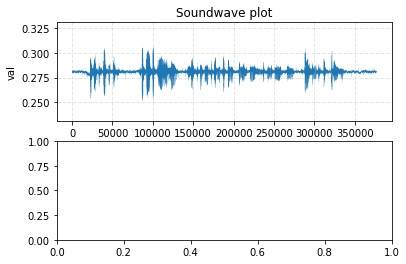

In [95]:
import matplotlib.pyplot as plt

data_float = []
to_float = lambda x: x / 8192.0
data_float = to_float(data_unpacked)

FREQUENCY = 32 * 1000
BYTES_PER_SAMPLE = 2

data_to_plot = data_float

dt = 1.0 / FREQUENCY
t = np.arange(0, len(data_to_plot), 1)

fig, axs = plt.subplots(len((data_to_plot, [])))

for i, data in enumerate((data_to_plot, )):
    axs[i].set_ylim([data.mean() - 0.05, data.mean() + 0.05])
    axs[i].plot(t, data, linewidth=0.1)
    axs[i].set(xlabel='sample', ylabel='val', title='Soundwave plot')
    axs[i].grid(color='k', alpha=0.2, linestyle='-.', linewidth=0.5)

Lets test some simple FFT case.

harmonic 0 is 0.0
harmonic 1 is -6.519090822720841e-15
harmonic 2 is -3.086420008457935e-14
harmonic 3 is 5.5594417958104714e-14
harmonic 4 is 99.99999999999996
harmonic 5 is -6.553091402849986e-14
harmonic 6 is -2.5618396293225487e-14
harmonic 7 is -9.195422201457859e-14
harmonic 8 is -6.492029136495603e-14
harmonic 9 is -1.17877929639576e-13
harmonic 10 is -6.589173651150304e-14
harmonic 11 is -8.382183835919932e-14
harmonic 12 is 200.0
harmonic 13 is 2.6911806116913795e-13
harmonic 14 is 2.4069635173873394e-13
harmonic 15 is 8.254508188088039e-14
harmonic 16 is 1.3494760864318778e-13
harmonic 17 is 1.2473355681663634e-13
harmonic 18 is -5.939693181744587e-14
harmonic 19 is -7.216449660063518e-16
harmonic 20 is 1.787459069646502e-14
harmonic 21 is -1.587618925213974e-14
harmonic 22 is 2.0505819264826641e-13
harmonic 23 is 1.2501111257279263e-13
harmonic 24 is -2.353672812205332e-14
harmonic 25 is -1.3322676295501878e-15
harmonic 26 is 1.744160371686121e-13
harmonic 27 is 1.0980105713

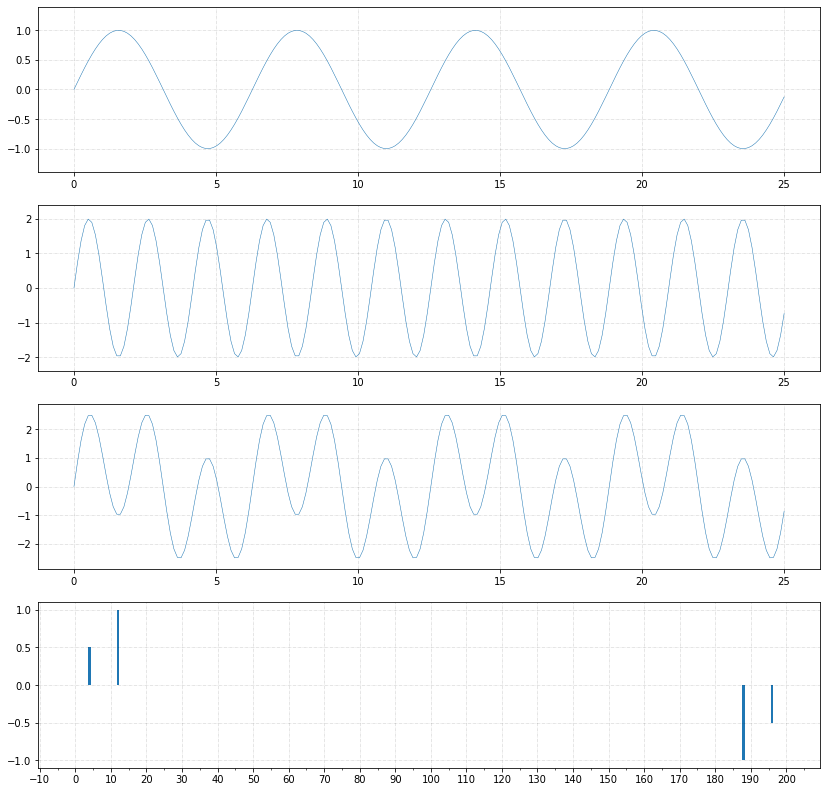

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from dataclasses import dataclass

@dataclass
class Waveform:
    cycles: int
    amplitude: int = 1
    # This will impact how many frequencies FFT analyzes.
    resolution: int = 200

    def get_wave(self):
        length = np.pi * 2 * self.cycles
        t = np.arange(0, length, length / self.resolution)
        return t, self.amplitude * np.sin(t)

t, harmonic01 = Waveform(cycles=4, amplitude=1).get_wave()
_, harmonic02 = Waveform(cycles=12, amplitude=2).get_wave()
#_, waveform03 = Waveform(cycles=5).get_wave()
waveform = harmonic01 + harmonic02

harmonics = np.zeros(len(t))
N = len(waveform)
for k, j in enumerate(range(N)):    
    potential_harmonic = 0
    for i, x in enumerate(waveform):
        n = i
        potential_harmonic += x * np.sin(np.pi * 2 * (k/N) * n)

    print(f"harmonic {j} is {potential_harmonic}")
    # Dividing by N means normalizing the result.
    harmonics[j] = potential_harmonic / N

data_to_plot = (harmonic01, harmonic02, waveform, harmonics)
fig, axs = plt.subplots(len(data_to_plot), figsize=(14, 14))

for i, data in enumerate(data_to_plot[:-1]):
    axs[i].set_ylim([data.min() - 0.4, data.max() + 0.4])
    axs[i].plot(t, data, linewidth=0.5)
    #axs[i].set(xlabel='sample', ylabel='val', title='Soundwave plot')
    axs[i].grid(color='k', alpha=0.2, linestyle='-.', linewidth=0.5)

axs[-1].bar(np.arange(len(harmonics)), harmonics)
axs[-1].grid(color='k', alpha=0.2, linestyle='-.', linewidth=0.5)
axs[-1].xaxis.set_major_locator(MultipleLocator(10))
axs[-1].xaxis.set_minor_locator(MultipleLocator(5))
    